# Real-world Data Wrangling

## 1. Gather data



In [65]:
import pandas as pd
import numpy as np
import os
import requests
import zipfile
import json
import matplotlib.pyplot as plt

### **1.1.** Problem Statement


The two datasets I am using are movie dataset from [kaggle.com](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata). This data is from The Movie Database and gives information such as the crew, budget, revenue, runtime and other variables. One of the datasets contains the full credits and the other contains information about the movie. 

Problem: What effect does the number of staff have on the movies?
Research question: What effect does the number of staff have on movies?
Specific question: Does the number of crew members affect the popularity?
Specific question:Does the number of crew members affect the runtime of the movie?
Specific question: Does the number of languages increase with the number of cast members?
Specific question: Does the number of languages increase with the number of crew members?

I am interested in these variables as the number of staff involved in a movie might affect a movie significantly. Popularity and crew size analysis might provide insights into how the involvement of more crew members might contribute to a movies’ success or appeal. It might show that there is an optimal crew size. Runtime may be affected with larger crews as there may be more ideas with more people involved and could lead to longer movies. Another interesting analysis is the number of languages used in a movie and more cast and diversity in a movie may be a way to reach more of a global audience and could be a for movie makers to optimise their success. 

### **1.2.** Gather at least two datasets using two different data gathering methods




#### **Dataset 1 (Movies dataset)**

**Type:** CSV File

**Method:** The data was gathered using the "Downloading files manually" method from [Kaggle source](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata).

I picked this dataset as there were two datasets in which I will be able to merge together afterwards. I picked the downloading method as this is a simple way to get the csv file into the jupyter notebook.

**Dataset variables:**

budget - budget of the movie  
genres - genres of the movie  
homepage - link to the movie homepage  
id - movie id  
keywords - keywords linked to the movie  
original_language - original language of the movie  
original_title -  The title of the movie before translation or adaptation  
overview - A brief description of the movie  
popularity - A numeric quantity specifying the movie popularity  
production_companies - The production companies of the movie  
production_countries - The production countries of the movie  
release_date - The date on which it was released  
revenue - revenue of the movie  
runtime - runtime of the movie  
spoken_languages - languages spoken in the movie  
status - whether the movie is released ,post production or rumored  
tagline - movie tagline  
title - title of the movie  
vote_average - average ratings the movie recieved  
vote_count - The number of votes the film received  


In [3]:
#read the downloaded csv file 
movies_df = pd.read_csv("/Users/miyuki/Documents/Udacity/tmdb_5000_movies.csv")

#### **Dataset 2 (Credits dataset)**

**Type:** CSV File

**Method:** The data was gathered using the "Gather data by accessing APIs" method from Kaggle source.

I gathered this data by accessing APIs as the link was provided on the kaggle website and it is a simple was to get the CSV file into the jupyter notebook. 

**Dataset variables:**  

movie_id -unique movie identifier  
title - title of the movie  
cast - full cast of the movie  
crew - full crew of the movie  


In [60]:
#Use the API command link from kaggle to gather data
!kaggle datasets download -d tmdb/tmdb-movie-metadata

100%|██████████████████████████████████████| 8.89M/8.89M [00:01<00:00, 8.69MB/s]
100%|██████████████████████████████████████| 8.89M/8.89M [00:01<00:00, 7.89MB/s]


In [66]:
#extract contents of zip file and place in Udacity folder
Udacity_folder = "/Users/miyuki/Documents/Udacity/"
zip_file_path = "tmdb-movie-metadata.zip"
with zipfile.ZipFile(zip_file_path, "r") as zip_ref:
    zip_ref.extractall(Udacity_folder)
    files_in_zip = zip_ref.namelist()
print(files_in_zip)

['tmdb_5000_credits.csv', 'tmdb_5000_movies.csv']


In [9]:
#read the csv file 
credits_df = pd.read_csv("/Users/miyuki/Documents/Udacity/tmdb_5000_credits.csv")

## 2. Assess data


### Quality Issue 1 (movies_df) :

In [7]:
#Inspecting the dataframe visually
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [223]:
#checking the statistics of each numerical column
movies_df.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [76]:
#checking the number of null values
movies_df.isnull().sum().sum()

3941

In [77]:
#checking the summary of the dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   id                    4803 non-null   int64  
 4   keywords              4803 non-null   object 
 5   original_language     4803 non-null   object 
 6   original_title        4803 non-null   object 
 7   overview              4800 non-null   object 
 8   popularity            4803 non-null   float64
 9   production_companies  4803 non-null   object 
 10  production_countries  4803 non-null   object 
 11  release_date          4802 non-null   object 
 12  revenue               4803 non-null   int64  
 13  runtime               4801 non-null   float64
 14  spoken_languages      4803 non-null   object 
 15  status               

In [78]:
#checking the dimensions
movies_df.shape

(4803, 20)

In [79]:
#check the number of unique values in each column
movies_df.nunique()

budget                   436
genres                  1175
homepage                1691
id                      4803
keywords                4222
original_language         37
original_title          4801
overview                4800
popularity              4802
production_companies    3697
production_countries     469
release_date            3280
revenue                 3297
runtime                  156
spoken_languages         544
status                     3
tagline                 3944
title                   4800
vote_average              71
vote_count              1609
dtype: int64

In [88]:
#check the dupicates
movies_df.duplicated().sum()

0

In [10]:
#creating a function to check the number of 0's in specified columns

def zero_value(df, column):
    sum_zeros = sum(df[column]==0)
    return sum_zeros

print(zero_value(movies_df, 'runtime'))
print(zero_value(movies_df, 'budget'))

35
1037


In [12]:
#check sort the values in runtime
movies_df['runtime'].sort_values()

4118      0.0
4210      0.0
4205      0.0
4571      0.0
4569      0.0
        ...  
1922    254.0
2631    276.0
2384    338.0
2656      NaN
4140      NaN
Name: runtime, Length: 4803, dtype: float64

**Issue and justification:**   
There is the issue of some movies having a 0 budget and 0 runtime. These issues are validity issues as there are no movies that can be made that have a budget of 0 or a runtime of 0. After reading the information about the dataset on kaggle.com, it states that the 0 budgets are likely to be from small budget films therefore, I will leave those in and just change the 0 runtime values. 

An additional issue, is that the data type of the release date is an object not datetime.   

Justifications for methods of assessment: Initially I looked at the dataframe visually using .head() function to see if there were any overarching issues immediately apparent form inspecting it visually. Then I dug a bit deeper using programmatic assessment tools. These tools included .describe() function. This showed that all of the numberical varaibles (apart from id) had a minimum of 0 which I found interesting. I then wanted to programmatically check the number of null values in the data set and noticed there were quite a few. I then used .info() and shape() to see where those nulls were and the data types of the columns. I could see that many of the nulls were in ‘homepage’ and ‘tagline’, these are two of the variables I will not be using in my analysis therefore I will remove these columns entirely instead of removing the nulls. I then checked for duplicates to check for uniqueness, and also found the number 0 runtime and 0 budget values. 

### Quality Issue 2 (credits_df) :

In [8]:
#FILL IN - Inspecting the dataframe visually
credits_df.head(5)

NameError: name 'credits_df' is not defined

In [83]:
#FILL IN - Inspecting the dataframe programmatically
credits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4803 non-null   int64 
 1   title     4803 non-null   object
 2   cast      4803 non-null   object
 3   crew      4803 non-null   object
dtypes: int64(1), object(3)
memory usage: 150.2+ KB


In [82]:
#check the dimensions
credits_df.shape

(4803, 4)

In [84]:
#check the number of unique values in each column
credits_df.nunique()

movie_id    4803
title       4800
cast        4761
crew        4776
dtype: int64

In [186]:
#Check what the repeating variable is and the count
max_count = credits_df['crew'].value_counts()[0]
max_crew = credits_df['crew'].value_counts().to_frame().idxmax()
print("Max count in crew column is: ", max_count, "Max value in crew column:",max_crew, sep='\n')

Max count in crew column is: 
28
Max value in crew column:
count    []
dtype: object


In [234]:
#check the cast column also to see if there are also empty lists in this column
credits_df.query('cast == "[]"').head()

,movie_id,title,cast,crew,cast_names
2601,17644,Barney's Great Adventure,[],"[{""credit_id"": ""52fe473b9251416c750921ff"", ""de...",[]
3670,447027,Running Forever,[],[],[]
3992,346081,Sardaarji,[],"[{""credit_id"": ""558ab3f4925141076f0001d7"", ""de...",[]
4009,126509,2016: Obama's America,[],"[{""credit_id"": ""52fe4ae1c3a368484e16bcd7"", ""de...",[]
4068,371085,Sharkskin,[],[],[]


In [175]:
#check the count of the number of [] values in the column
credits_df['cast'].value_counts()[0]

43

In [89]:
#check if there are duplicates in the dataframe
credits_df.duplicated().sum()

0

Issue and justification:  Initially I looked at the dataframe visually using .head() function to see if there were any overarching issues immediately apparent form inspecting it visually. Then I dug a bit deeper using programmatic assessment tools. The info() function showed that all of the columns had 4803 entries, I then checked the shape of the data frame to see how many rows in total there were. This helped to show that there were no null values. I then checked to see the number of unique values in each column, this showed that there are some in the cast and crew columns that are not unique. As it is highly unlikely that the movies have exactly the same crew or cast, I checked these columns to see what the duplicates were in the two columns crew and cast. There are empty lists in these columns which need to be changed to be fixed. This is a quality issue as these should be null values and possibly removed. 


### Tidiness Issue 1(movies):

In [91]:
#FILL IN - Inspecting the dataframe visually
movies_df.sample(5)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
1266,40000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",NaN,24418,"[{""id"": 3133, ""name"": ""vampire""}, {""id"": 3986,...",en,Cirque du Freak: The Vampire's Assistant,Darren Shan is a regular teenage kid. He and h...,16.424807,"[{""name"": ""Universal Pictures"", ""id"": 33}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-10-23,28169671,109.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Meet Darren. He's sixteen going on immortal.,Cirque du Freak: The Vampire's Assistant,5.5,348
1769,27000000,"[{""id"": 10751, ""name"": ""Family""}, {""id"": 35, ""...",http://spykidsmovie.net/,56288,"[{""id"": 470, ""name"": ""spy""}, {""id"": 3650, ""nam...",en,Spy Kids: All the Time in the World,"Eight years after the third film, the OSS has ...",14.788073,"[{""name"": ""Dimension Films"", ""id"": 7405}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2011-08-18,85564310,89.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Spy Kids: All the Time in the World,4.4,222
1032,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,11467,"[{""id"": 774, ""name"": ""film business""}, {""id"": ...",en,America's Sweethearts,In the midst of a nasty public breakup of marr...,10.698929,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2001-07-17,0,102.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Hollywood's hottest couple just split up. It'l...,America's Sweethearts,5.5,252
3392,3500000,"[{""id"": 9648, ""name"": ""Mystery""}, {""id"": 18, ""...",NaN,1956,"[{""id"": 1333, ""name"": ""desperation""}, {""id"": 3...",en,Gerry,Two friends named Gerry become lost in the des...,5.038953,"[{""name"": ""Epsilon Motion Pictures"", ""id"": 117...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2002-01-12,0,103.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,NaN,Gerry,6.2,68
4648,0,"[{""id"": 18, ""name"": ""Drama""}]",http://www.ontheouts.com/,78307,"[{""id"": 378, ""name"": ""prison""}, {""id"": 2231, ""...",en,On the Outs,Follows the choices made by three young women ...,0.493223,"[{""name"": ""Youth House Productions"", ""id"": 819...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-09-11,0,86.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,A drug dealer. An addict. A runaway. The story...,On the Outs,5.9,6


In [49]:
#FILL IN - Inspecting the dataframe programmatically
movies_df['spoken_languages'][2]

'[{"iso_639_1": "fr", "name": "Fran\\u00e7ais"}, {"iso_639_1": "en", "name": "English"}, {"iso_639_1": "es", "name": "Espa\\u00f1ol"}, {"iso_639_1": "it", "name": "Italiano"}, {"iso_639_1": "de", "name": "Deutsch"}]'

Issue and justification: Immediately from the visual inspection using .sample() function, you can see that there are multiple variables in the 'genres', 'keywords, 'production_companies', 'production_countries' and 'spoken_languages' columns which is a tidiness issue as there should be only one variable in each column. I used programmatic inspection after this to fully see what was in the spoken languages column as I want to use this for my analysis later on.

### Tidiness Issue 2(credits): 

In [93]:
#FILL IN - Inspecting the dataframe visually
credits_df.sample(5)

,movie_id,title,cast,crew
4121,22913,24 7: Twenty Four Seven,"[{""cast_id"": 4, ""character"": ""Alan Darcy"", ""cr...","[{""credit_id"": ""52fe4455c3a368484e01d405"", ""de..."
2185,18357,The Country Bears,"[{""cast_id"": 1, ""character"": ""Beary Barrington...","[{""credit_id"": ""592992079251413b5b04ed56"", ""de..."
436,109418,Grown Ups 2,"[{""cast_id"": 5, ""character"": ""Lenny Feder"", ""c...","[{""credit_id"": ""52fe4ab4c3a36847f81dd247"", ""de..."
2733,10131,A Nightmare on Elm Street 4: The Dream Master,"[{""cast_id"": 1, ""character"": ""Freddy Krueger"",...","[{""credit_id"": ""52fe43309251416c75006d1d"", ""de..."
509,953,Madagascar,"[{""cast_id"": 1, ""character"": ""Alex"", ""credit_i...","[{""credit_id"": ""557caebfc3a3686334002304"", ""de..."


In [218]:
#FILL IN - Inspecting the dataframe programmatically
#inspecting the first row in the crew column
credits_df['crew'][0]

'[{"credit_id": "52fe48009251416c750aca23", "department": "Editing", "gender": 0, "id": 1721, "job": "Editor", "name": "Stephen E. Rivkin"}, {"credit_id": "539c47ecc3a36810e3001f87", "department": "Art", "gender": 2, "id": 496, "job": "Production Design", "name": "Rick Carter"}, {"credit_id": "54491c89c3a3680fb4001cf7", "department": "Sound", "gender": 0, "id": 900, "job": "Sound Designer", "name": "Christopher Boyes"}, {"credit_id": "54491cb70e0a267480001bd0", "department": "Sound", "gender": 0, "id": 900, "job": "Supervising Sound Editor", "name": "Christopher Boyes"}, {"credit_id": "539c4a4cc3a36810c9002101", "department": "Production", "gender": 1, "id": 1262, "job": "Casting", "name": "Mali Finn"}, {"credit_id": "5544ee3b925141499f0008fc", "department": "Sound", "gender": 2, "id": 1729, "job": "Original Music Composer", "name": "James Horner"}, {"credit_id": "52fe48009251416c750ac9c3", "department": "Directing", "gender": 2, "id": 2710, "job": "Director", "name": "James Cameron"},

In [208]:
#Accessing the first entry in the cast column and parseing the JSON column to a python object
first_cast = credits_df['cast'][0]
parsed_cast = json.loads(first_cast)

# Accessing details of the first cast member
parsed_cast[0]

{'cast_id': 242,
 'character': 'Jake Sully',
 'credit_id': '5602a8a7c3a3685532001c9a',
 'gender': 2,
 'id': 65731,
 'name': 'Sam Worthington',
 'order': 0}

**Issue and justification:**  
There are multiple variables in the 'cast' and 'crew' column which are not required. This can be seen visually from the sample() function used initially. Then programmatically checking the entries I found that in the cast column, the cast_id, character, credit_id, gender, id, name, and order is included for each character. There should only be one variable in each column therefore they should either be split or removed from the column. In this case, I just want the actor/actresses name separated by a comma, therefore I will tidy the column up with just the cast name. The crew column has credit_id, department, gender, id, job, and name. Again I will tidy this column as I only want one variable in each column. 

An additional quality issue is the consistency issue, where in the movies dataframe the column name for id is 'id' and the column name in this dataframe is 'movie_id'. This will be changed to make them consistent. 

## 3. Clean data


In [100]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes 
# are not impacted
cleaned_movies = movies_df.copy()
cleaned_credits = credits_df.copy()

### **Quality Issue 1(movies): Replace the 0 runtime with the mean and rename 'id' column**

In [101]:
#filter out the 0 runtime and finding the new mean
mean_runtime = cleaned_movies[cleaned_movies['runtime'] != 0]['runtime'].mean()
mean_runtime

107.66072177926983

The runtime mean does not change much if I remove the runtime of 0 from the calculation (the original mean was 106.875859 from using the describe() function while inspecting the dataset earlier), however, I will use this calculation of the mean as it is more accurate than the mean that includes the zero run times to replace the 0 run times with. 

In [102]:
#replace 0 runtime with the mean runtime
cleaned_movies.loc[cleaned_movies['runtime'] == 0, 'runtime'] = mean_runtime

In [103]:
#sort the values 
cleaned_movies['runtime'].sort_values()

4466     14.0
4709     25.0
3626     41.0
3471     42.0
3354     46.0
        ...  
1922    254.0
2631    276.0
2384    338.0
2656      NaN
4140      NaN
Name: runtime, Length: 4803, dtype: float64

The 0 runtimes have now been removed and there are a couple of null values which I will replace with the mean as well. 

In [104]:
# Replace NaN values with the mean
cleaned_movies['runtime'].fillna(mean_runtime, inplace=True)

In [105]:
#rename the column id to movie id for consistency
cleaned_movies.rename(columns={'id':'movie_id'}, inplace=True)

In [106]:
# Validate the cleaning was successful and that all the values are greater than 0
assert (cleaned_movies['runtime'] >0).all()

In [107]:
#check the column name has been changed
cleaned_movies.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


**Justification:** I have replaced the 0 runtime and null runtime values with the mean runtime. This is beacuse the quality issue of the runtime being 0. A movie needs to have a runtime therefore these have been replaced. I used sort_values() to check if there were no more 0 values in the column after replacing them. I could see there were also two null values in which I also wanted to replace therefore I used the fillna function. 
I also renamed the id column to movie_id to make the column consistent between the two datasets and used head() to check if the column name had changed.   
I uesd the assert statement to programmatically check that cleaning was successful.  
I will not change the data type of the 'release_date' as I am going to remove this column as it is not required for this analysis. 

### **Quality Issue 2(credits):  Replace the empty lists with null values and remove some of them**

In [108]:
#Apply the cleaning strategy
#make a function that replaces the empty lists with null values
def remove_empty_list(column):
    cleaned_credits[column] = cleaned_credits[column].replace({'[]': np.nan})
    return cleaned_credits
#use the function on the columns 'crew' and 'cast'
remove_empty_list('crew')
remove_empty_list('cast')

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [109]:
#checking for nulls in the columns
cleaned_credits.isnull().sum()

movie_id     0
title        0
cast        43
crew        28
dtype: int64

In [110]:
#Remove the columns with NA in both cast and crew
cleaned_credits.dropna(subset=['cast', 'crew'], how='all', inplace=True)

In [111]:
#Validate the cleaning was successful
cleaned_credits.isnull().sum()

movie_id     0
title        0
cast        22
crew         7
dtype: int64

Justification: There were empty lists in the crew and cast columns. These were not counted as nulls so therefore I replaced them with null values using an original function as I wanted to do the same for both columns and did not want to use repetititve code. I then removed the rows with nulls in both these columns using the dropna function. I want to keep the rest of the rows as I want to use the crew and cast variables in my following analysis and don't want to remove too many rows as this will make my sample size smaller and my analysis less reliable.

### **Tidiness Issue 1(movies): Multiple variables in one column**

In [112]:
#Apply the cleaning strategy
#Drop unneeded rows
cleaned_movies_new = cleaned_movies.drop(['genres','original_language', 'title','homepage','release_date','original_title','production_companies','production_countries','status','vote_count','vote_average','keywords','overview','tagline'],axis=1)
#check they've been dropped
cleaned_movies_new.head()

,budget,movie_id,popularity,revenue,runtime,spoken_languages
0,237000000,19995,150.437577,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso..."
1,300000000,285,139.082615,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
2,245000000,206647,107.376788,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},..."
3,250000000,49026,112.312950,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"
4,260000000,49529,43.926995,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]"


In [113]:
# A function to extract the names in each row
def extract_names(row):
    # Check if the value is a string (or convert non-string values to a string)
    if isinstance(row, str):
        parsed_row = json.loads(row)
        names = ', '.join([name['name'] for name in parsed_row])
    else:
        names = ''
    return names
#use the function to extract the names of the language and create a new column
cleaned_movies_new['languages_spoken'] = cleaned_movies_new['spoken_languages'].apply(extract_names)
#remove the spoken_languages column
cleaned_movies_new.drop('spoken_languages', axis=1, inplace=True)

In [114]:
#FILL IN - Validate the cleaning was successful
cleaned_movies_new.head()

,budget,movie_id,popularity,revenue,runtime,languages_spoken
0,237000000,19995,150.437577,2787965087,162.0,"English, Español"
1,300000000,285,139.082615,961000000,169.0,English
2,245000000,206647,107.376788,880674609,148.0,"Français, English, Español, Italiano, Deutsch"
3,250000000,49026,112.312950,1084939099,165.0,English
4,260000000,49529,43.926995,284139100,132.0,English


**Justification:**  
I first dropped the unneeded rows using .drop(). This is a simple function to drop anything unneeded. I created a new dataframe called cleaned_movies_new as I dropped many of the columns and if I wish to use the dropped columns in an analysis in the future I can still use cleaned_movies dataframe that still has all of the columns. Then I created a function to extract the names in each row. I will use multiple times to reduce repetitive code. I used it for the spoken languages column and then remove that column and made a new one with just the names of the languages without the extra information such as the standardised nomenclature classifying the language.     
Finally I used head() to check if my new column was correct and the old messy column was removed. 

### **Tidiness Issue 2(credits): Remove columns with multiple variables**

In [115]:
#Apply the cleaning strategy
# Use the function created above to each row in the 'cast' column to create a new column 'cast_names'
cleaned_credits['cast_names'] = cleaned_credits['cast'].apply(extract_names)
cleaned_credits['crew_names'] = cleaned_credits['crew'].apply(extract_names)

In [116]:
#drop the original cast and crew rows
cleaned_credits.drop(columns=['cast', 'crew'], inplace=True)

In [117]:
#Validate the cleaning was successful using .head()
cleaned_credits.head()

,movie_id,title,cast_names,crew_names
0,19995,Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Stephen E. Rivkin, Rick Carter, Christopher Bo..."
1,285,Pirates of the Caribbean: At World's End,"Johnny Depp, Orlando Bloom, Keira Knightley, S...","Dariusz Wolski, Gore Verbinski, Jerry Bruckhei..."
2,206647,Spectre,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...","Thomas Newman, Sam Mendes, Anna Pinnock, John ..."
3,49026,The Dark Knight Rises,"Christian Bale, Michael Caine, Gary Oldman, An...","Hans Zimmer, Charles Roven, Christopher Nolan,..."
4,49529,John Carter,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...","Andrew Stanton, Andrew Stanton, John Lasseter,..."


**Justification:**  
I used the function created in the last section to extract just the names of the cast and crew members without the additional information that is not required for this analysis. I used the drop function to remove the original columns and used head() to check that that celaning was successful.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [118]:
#combine datasets using pandas merge
merged_movies = pd.merge(cleaned_movies_new, cleaned_credits)
merged_movies.head()

,budget,movie_id,popularity,revenue,runtime,languages_spoken,title,cast_names,crew_names
0,237000000,19995,150.437577,2787965087,162.0,"English, Español",Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Stephen E. Rivkin, Rick Carter, Christopher Bo..."
1,300000000,285,139.082615,961000000,169.0,English,Pirates of the Caribbean: At World's End,"Johnny Depp, Orlando Bloom, Keira Knightley, S...","Dariusz Wolski, Gore Verbinski, Jerry Bruckhei..."
2,245000000,206647,107.376788,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Spectre,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...","Thomas Newman, Sam Mendes, Anna Pinnock, John ..."
3,250000000,49026,112.312950,1084939099,165.0,English,The Dark Knight Rises,"Christian Bale, Michael Caine, Gary Oldman, An...","Hans Zimmer, Charles Roven, Christopher Nolan,..."
4,260000000,49529,43.926995,284139100,132.0,English,John Carter,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...","Andrew Stanton, Andrew Stanton, John Lasseter,..."


In [119]:
#creating a function to get the number of names in the cell
def get_length(row):  
    if isinstance(row,str):
        return len(row.split(', '))
    else:
        return 0
#creating three new columns with the number of languages, crew and cast in each movie
merged_movies['num_lang'] = merged_movies['languages_spoken'].apply(get_length)
merged_movies['num_crew'] = merged_movies['crew_names'].apply(get_length)
merged_movies['num_cast'] = merged_movies['cast_names'].apply(get_length)

In [120]:
merged_movies.head()

,budget,movie_id,popularity,revenue,runtime,languages_spoken,title,cast_names,crew_names,num_lang,num_crew,num_cast
0,237000000,19995,150.437577,2787965087,162.0,"English, Español",Avatar,"Sam Worthington, Zoe Saldana, Sigourney Weaver...","Stephen E. Rivkin, Rick Carter, Christopher Bo...",2,153,83
1,300000000,285,139.082615,961000000,169.0,English,Pirates of the Caribbean: At World's End,"Johnny Depp, Orlando Bloom, Keira Knightley, S...","Dariusz Wolski, Gore Verbinski, Jerry Bruckhei...",1,32,34
2,245000000,206647,107.376788,880674609,148.0,"Français, English, Español, Italiano, Deutsch",Spectre,"Daniel Craig, Christoph Waltz, Léa Seydoux, Ra...","Thomas Newman, Sam Mendes, Anna Pinnock, John ...",5,155,83
3,250000000,49026,112.312950,1084939099,165.0,English,The Dark Knight Rises,"Christian Bale, Michael Caine, Gary Oldman, An...","Hans Zimmer, Charles Roven, Christopher Nolan,...",1,217,158
4,260000000,49529,43.926995,284139100,132.0,English,John Carter,"Taylor Kitsch, Lynn Collins, Samantha Morton, ...","Andrew Stanton, Andrew Stanton, John Lasseter,...",1,132,27


For my analysis I want to look at the value count of the crew, cast and languages used in the film, so additionally in this section I have added three columns to the new merged_movies dataframe.

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [121]:
#FILL IN - saving the cleaned data
cleaned_movies.to_csv('/Users/miyuki/Documents/Udacity/cleaned_movies.csv')
cleaned_credits.to_csv('/Users/miyuki/Documents/Udacity/cleaned_credits.csv')
merged_movies.to_csv('/Users/miyuki/Documents/Udacity/merged_movie.csv')

Note:  The raw data was saved initially in my Udacity folder.


## 5. Answer the research question

### **5.1:** Define and answer the research question 


*Research question:* What effect does the number of staff have on movies?  
*Specific question:* Does the number of crew members affect the popularity?

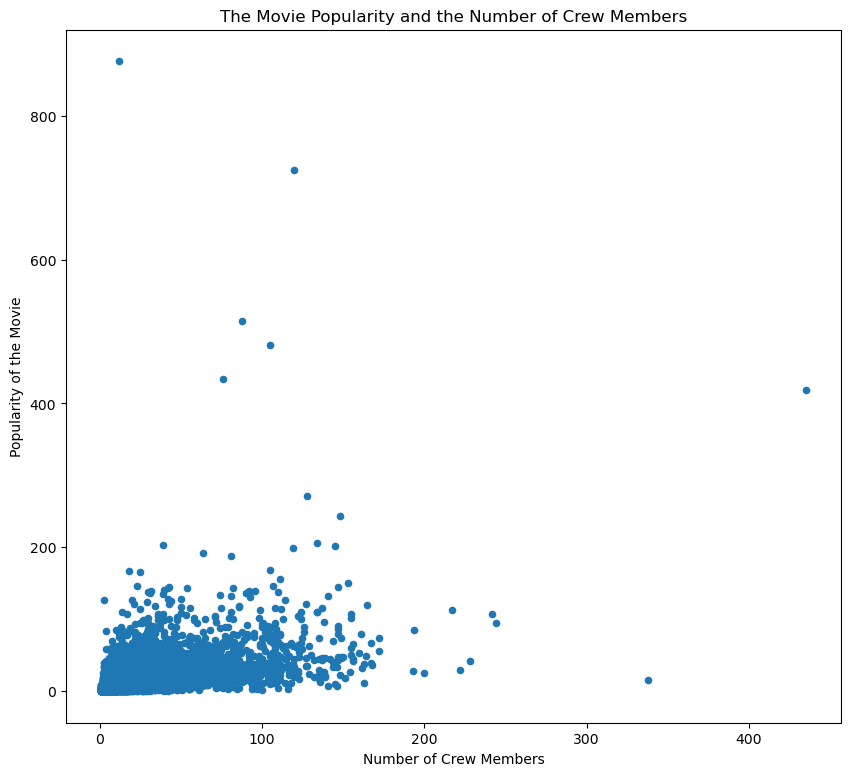

In [122]:
#Plotting the number of crew members and popularity using a scatter plot

merged_movies.plot(x='num_crew', y='popularity', kind='scatter', 
                   title = 'The Movie Popularity and the Number of Crew Members',
                  xlabel='Number of Crew Members',
                  ylabel='Popularity of the Movie',
                  figsize=(10,9));

In [123]:
#Filter the dataframe to exclude the outliers in 'Popularity'
pop_outliers_removed = merged_movies[(merged_movies['popularity'] <= 400)]

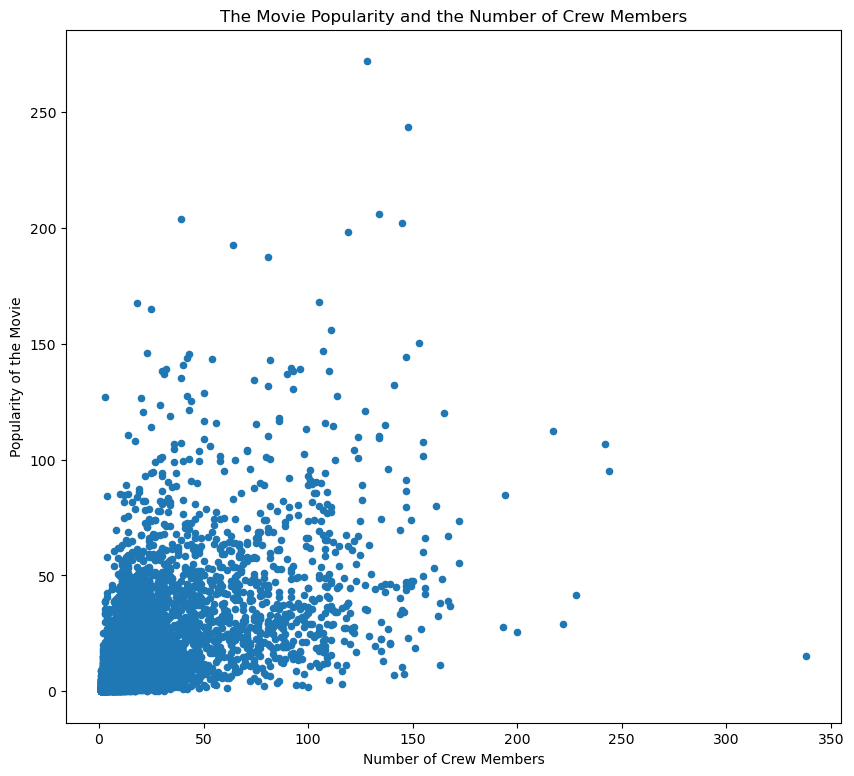

In [124]:
#make a new scatter plot with outliers of popularity removed
pop_outliers_removed.plot(x='num_crew', y='popularity', kind='scatter',
                          title = 'The Movie Popularity and the Number of Crew Members',
                          xlabel='Number of Crew Members',
                          ylabel='Popularity of the Movie',
                          figsize=(10,9));

*Specific question:* Does the number of crew members affect the runtime of the movie?

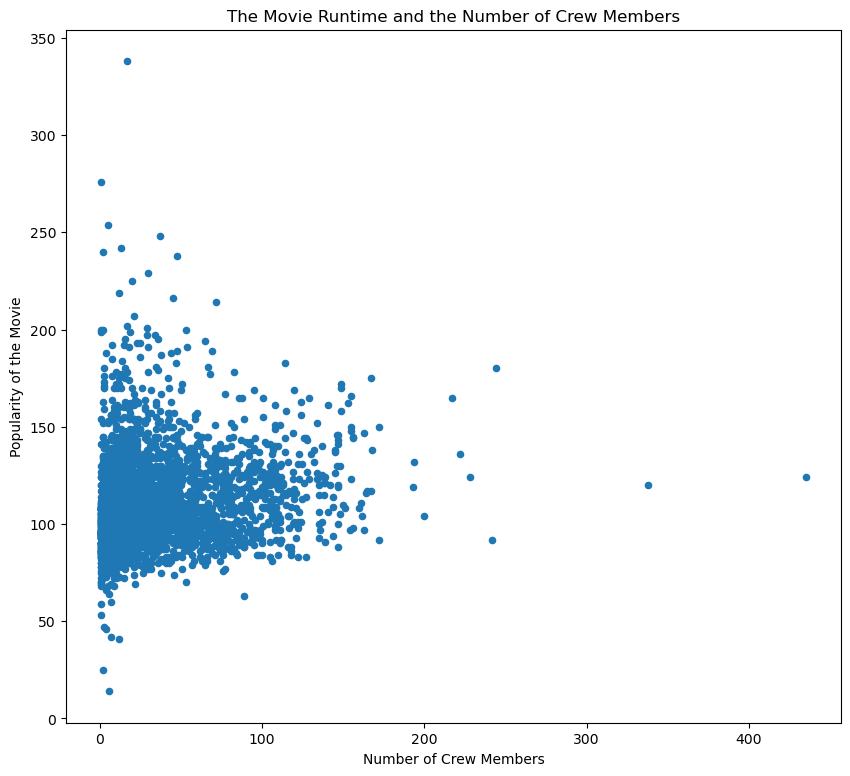

In [125]:
merged_movies.plot(x='num_crew', y='runtime', kind='scatter',
                   title = 'The Movie Runtime and the Number of Crew Members',
                   xlabel='Number of Crew Members',
                   ylabel='Popularity of the Movie',
                   figsize=(10,9));

__*Answer to research question:*__   
__*Research question:* What effect does the number of staff have on movies?__  
*Specific question:* Does the number of crew members affect the popularity?
From the scatter plot there is not enough information to say that there is a relationship between the number of crew members and the popularity of the movie. A further analysis and r value calculation would be necessary to make a confident statement.   
*Specific question:* Does the number of crew members affect the runtime of the movie?
Initially I thought that if there were more crew, there would be more ideas and therefore the movie would run longer. However, from the scatter plot it looks as though there is an average runtime and that the number of crew members does not affect the the runtime of the movie. Further analysis and r value calculation would be necessary to make a confident statement. 

*Specific question:* Does the number of languages increase with the number of cast members?

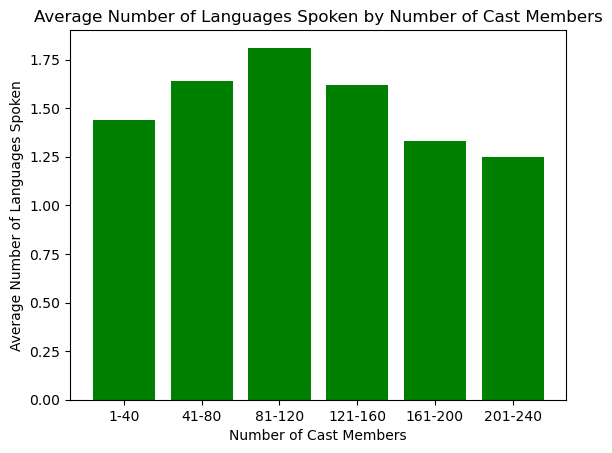

In [204]:
#Visual 2 
# Creating 6 bins for the 'num_cast' column to turn continuous varible into categorical
bins_for_cutting = list(range(0, 280, 40))
merged_movies['Cast_Bins'] = pd.cut(merged_movies['num_cast'], bins=bins_for_cutting, labels=False)

# Calculating the average number of languages spoken for each bin
avg_languages_per_bin = merged_movies.groupby('Cast_Bins')['num_lang'].mean()


# Plotting the average number of languages per bin with custom labels
plt.bar(avg_languages_per_bin.index, avg_languages_per_bin.values, color='green')
plt.xlabel('Number of Cast Members')
plt.ylabel('Average Number of Languages Spoken')
plt.title('Average Number of Languages Spoken by Number of Cast Members')


# Set x-axis labels using bin ranges
labels = [f'{i}-{i+39}' for i in range(1, 240, 40)]
plt.xticks(range(len(labels)), labels)
plt.show()

*Specific question:* Does the number of languages increase with the number of crew members?

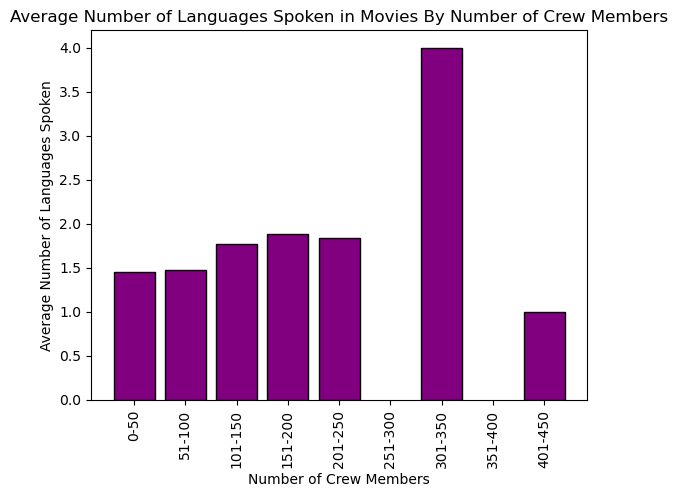

In [178]:
# Creating 6 bins for the 'num_crew' column
bins = list(range(0, 500, 50))
merged_movies['Crew_Bins'] = pd.cut(merged_movies['num_crew'], bins=bins, labels=False, right = False)

# Calculating the average number of languages spoken for each bin
avg_languages_per_crewbin = merged_movies.groupby('Crew_Bins')['num_lang'].mean()

# Plotting the average number of languages per bin 
plt.bar(avg_languages_per_crewbin.index, avg_languages_per_crewbin.values, color='purple', edgecolor="k")
plt.xlabel('Number of Crew Members')
plt.ylabel('Average Number of Languages Spoken')
plt.title('Average Number of Languages Spoken in Movies By Number of Crew Members')

# Set x-axis labels using bin ranges
plt.xticks(np.arange(9), ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450'], rotation = 90)
plt.show()

__*Answer to research question:*__  
*Specific question:* Does the number of cast members affect the number of languages spoken in the movie?
The average number of langauges spoken for movies increases as the number of cast members increase from 1 to 120 cast members. This might suggest that movies with a larger cast tend to involve a more diverse range of languages.
However, from the range 121-160 there is a drop in the average number of languages spoken in movies.
The drop may be due to budget constraints, script requirements and time limitations. A further analysis is required for deeper insights to understand the results. 

*Specific question:* Does the number of crew members affect the number of languages spoken in the movie?  
The average number of langauges spoken in movies increases as the number of crew members increases from the grouped crew members 0-50, 51-100, 101-150 and 151-200. After this we have a slight decrease in the average number of languages spoken between 201-250 crew members. There are no movies with 251-300 and 351-400 crew members but there is a big jump in the number of languages spoken in movies with crew members of 301-350 people. Then there was a drop in the number of languages spoken in the movies with 401-450 crew members. This may again be due to budget constraints and there may be difficulties associated with having many languages in a movie due to messages lost in translation.

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?  


__*Answer:*__  
I would make two new tables with the cast and crew information as the information were additional observational units and have a lot of information (e.g. gender). The information was in one column and for the purposes of my analysis I did not require the additional information, however, if I wanted to ask more questions and do further analysis, the information on the cast and crew in different tables would be useful. I could further look into if the higher revenue movies had the same sililar crew members or see if one person is associated with the highest earning movies or see if a male dominated crew has a higher budget or greater runtime. 

I would also change the data type of release_date to a datetime instead of object, however, in this analysis I did not use this variable therefore have not altered the data type. 

The movies that have the status of 'rumored' may have had a runtime of 0, and therefore a runtime of 0 could have been valid, however, by going back and quickly checking the rows that are 'rumored', only one of them had a runtime of 0. Therefore the changing of runtime 0 is justified. 

The variables number of crew members, cast members and languages spoken may have some outliers in the data. If I had more time to complete the analysis fully I would check the variables for outliers and ensure that I removed them as they may cause some skew in the results of the analysis. 

The graph 'Average Number of Languages Spoken by Number of Cast Members' and the graph 'Average Number of Languages Spoken in Movies By Number of Crew Members' have different y axis scaling and therefore could cause misleading results. I would ensure that this is obvious when explaining the results. 